In [1]:
#zona imports.
import re
from graphviz import Digraph
from scipy import stats
from scipy.stats import rv_discrete
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
terminales = ["u","a","g","i","j","k","b","c","d","e","f","x"]#AGREGAR PARA NUEVAS PRODUCCIONES

In [3]:
no_terminales = ["W","X","Y","Z","A","C"] #AGREGAR PARA NUEVAS PRODUCCIONES

In [4]:
#AGREGAR PARA NUEVAS PRODUCCIONES
#Guardo la produccion con su objeto probabilistico listo para aplicarle .rvs()
prod = {
    "S" : [["W"],rv_discrete("W",values=([[0,1],(1.0,0)]))],
    "W" : [["uX"],rv_discrete("uX",values = ([[0,1],(1.0,0)]))],
    "X" : [["xY","cZ"],rv_discrete("prodX",values = ([[0,1],(0.7,0.3)]))],
    "Y" : [["a","b"],rv_discrete("prodY",values = ([[0,1],(0.2,0.8)]))],
    "Z" : [["gAB","dg"],rv_discrete("prodZ",values = ([[0,1],(0.5,0.5)]))],
    "A" : [["ijk","kiC"],rv_discrete("prodA",values = ([[0,1],(0.6,0.4)]))],
    "B" : [["eB"],rv_discrete("prodB",values = ([[0,1],(1.0,0)]))],
    "C" : [["fA"],rv_discrete("prodC",values = ([[0,1],(1.0,0)]))]
    
}

In [5]:
primer_prod = "S"

In [6]:
def producir(producciones, produccion_origen,G, iteraciones):
    ''' Caso Base profundidad alcanzada '''
    if iteraciones == 0:
        print("Profundidad pedida alcanzada.")
        return
    
    ''' Caso Base '''
    for p in producciones:
        
        G.add_node(p)
        G.add_edge(produccion_origen,p)
       
        if (p not in terminales):
            print("dibujar no Terminal {}".format(p))
                
            valores = prod.get(p)#Obtengo los valores posibles de la produccion.
            prob_result = valores[1].rvs()#Obtengo un int que es el indice de las prob values posibles.
            prob_posib = valores[0]#Obtengo las posibles producciones de esta produccion
            produc = prob_posib[prob_result]#Obtengo la produccion desde la posibilidad dada.
            
            producir(produc,p,G,iteraciones-1)
        else:
            ''' Caso Base Terminal '''

            print("dibujar Terminal ({})".format(p))

In [7]:
#####
#####
def producir_recur(ite):
    G=nx.DiGraph()

    sig_prod = prod[primer_prod]
    producir(sig_prod[0],primer_prod,G,ite)
    plt.title('Árbol de Producción')
    pos = graphviz_layout(G,prog='dot')
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show() # display


dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (c)
dibujar no Terminal Z
dibujar Terminal (d)
dibujar Terminal (g)


/home/mati/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/mati/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/mati/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/mati/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

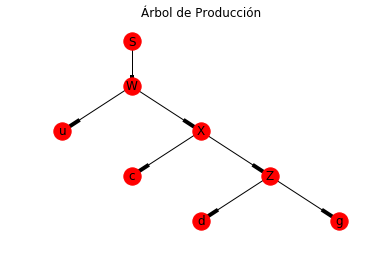

In [8]:
producir_recur(8)